# Reinforcement Learning: Zero to Hero - Part 6/17

**Cells 101-120 of 291**



#### Visualizing Faster Convergence of TD(0)

One of the key advantages of TD learning is faster convergence. Let's visualize this by tracking how the value estimates evolve over episodes.

In [47]:
# def td_prediction_with_tracking(env, policy, num_episodes=500, alpha=0.1, gamma=0.9, track_state=(0,0)):
#     """
#     TD(0) prediction with tracking of value estimates over time.
    
#     Args:
#         env: Environment
#         policy: Policy function
#         num_episodes: Number of episodes
#         alpha: Learning rate
#         gamma: Discount factor
#         track_state: State to track value estimates for
    
#     Returns:
#         V: Final value function
#         value_history: List of value estimates for tracked state
#     """
#     V = defaultdict(float)
#     value_history = []
    
#     for episode in range(num_episodes):
#         state = env.reset()
        
#         while True:
#             action = policy(state)
#             next_state, reward, done, _ = env.step(action)
            
#             # TD(0) update
#             td_target = reward + gamma * V[next_state]
#             td_error = td_target - V[state]
#             V[state] = V[state] + alpha * td_error
            
#             if done:
#                 break
            
#             state = next_state
        
#         # Track value estimate after each episode
#         value_history.append(V[track_state])
    
#     return V, value_history


# def mc_prediction_with_tracking(env, policy, num_episodes=500, gamma=0.9, track_state=(0,0)):
#     """
#     Monte Carlo prediction with tracking of value estimates over time.
#     """
#     V = defaultdict(float)
#     returns = defaultdict(list)
#     value_history = []
    
#     for episode in range(num_episodes):
#         # Generate episode
#         episode_data = []
#         state = env.reset()
        
#         while True:
#             action = policy(state)
#             next_state, reward, done, _ = env.step(action)
#             episode_data.append((state, reward))
            
#             if done:
#                 break
#             state = next_state
        
#         # Calculate returns and update values (first-visit)
#         G = 0
#         visited = set()
        
#         for state, reward in reversed(episode_data):
#             G = reward + gamma * G
            
#             if state not in visited:
#                 visited.add(state)
#                 returns[state].append(G)
#                 V[state] = np.mean(returns[state])
        
#         # Track value estimate after each episode
#         value_history.append(V[track_state])
    
#     return V, value_history


# # Run both algorithms with tracking
# print("Tracking Convergence: TD(0) vs Monte Carlo")
# print("="*60)

# env = GridWorldEnvironment(grid_size=4, goal_pos=(3, 3), obstacles=[])
# track_state = (0, 0)  # Track the start state
# num_episodes = 500

# print(f"Tracking value estimates for state {track_state}...")

# # Run multiple times to get average behavior
# num_runs = 20
# td_histories = []
# mc_histories = []

# for run in range(num_runs):
#     # TD(0)
#     _, td_hist = td_prediction_with_tracking(env, greedy_policy, 
#                                              num_episodes=num_episodes,
#                                              alpha=0.1, gamma=0.9,
#                                              track_state=track_state)
#     td_histories.append(td_hist)
    
#     # Monte Carlo
#     _, mc_hist = mc_prediction_with_tracking(env, greedy_policy,
#                                              num_episodes=num_episodes,
#                                              gamma=0.9,
#                                              track_state=track_state)
#     mc_histories.append(mc_hist)

# # Average across runs
# td_avg = np.mean(td_histories, axis=0)
# mc_avg = np.mean(mc_histories, axis=0)

# # Calculate standard deviation for confidence bands
# td_std = np.std(td_histories, axis=0)
# mc_std = np.std(mc_histories, axis=0)

# # Create visualization
# fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# # Plot 1: Convergence comparison
# ax = axes[0]
# episodes = np.arange(num_episodes)

# # TD(0) line
# ax.plot(episodes, td_avg, linewidth=2, color='blue', label='TD(0)', alpha=0.8)
# ax.fill_between(episodes, td_avg - td_std, td_avg + td_std, 
#                 alpha=0.2, color='blue')

# # Monte Carlo line
# ax.plot(episodes, mc_avg, linewidth=2, color='red', label='Monte Carlo', alpha=0.8)
# ax.fill_between(episodes, mc_avg - mc_std, mc_avg + mc_std, 
#                 alpha=0.2, color='red')

# ax.set_xlabel('Episode', fontsize=12)
# ax.set_ylabel(f'Value Estimate for State {track_state}', fontsize=12)
# ax.set_title('Convergence Speed: TD(0) vs Monte Carlo', fontsize=13, fontweight='bold')
# ax.legend(fontsize=11)
# ax.grid(True, alpha=0.3)

# # Plot 2: Variance comparison
# ax = axes[1]

# # Calculate rolling standard deviation (variance proxy)
# window = 50
# td_rolling_std = pd.Series(td_avg).rolling(window=window, min_periods=1).std()
# mc_rolling_std = pd.Series(mc_avg).rolling(window=window, min_periods=1).std()

# ax.plot(episodes, td_rolling_std, linewidth=2, color='blue', 
#         label='TD(0)', alpha=0.8)
# ax.plot(episodes, mc_rolling_std, linewidth=2, color='red', 
#         label='Monte Carlo', alpha=0.8)

# ax.set_xlabel('Episode', fontsize=12)
# ax.set_ylabel(f'Rolling Std Dev (window={window})', fontsize=12)
# ax.set_title('Variance Comparison', fontsize=13, fontweight='bold')
# ax.legend(fontsize=11)
# ax.grid(True, alpha=0.3)

# plt.tight_layout()
# plt.show()

# # Print statistics
# print("" + "="*60)
# print("📊 Convergence Analysis:")

# # Find when each method gets close to final value
# td_final = td_avg[-1]
# mc_final = mc_avg[-1]
# threshold = 0.1  # Within 10% of final value

# td_converge = np.where(np.abs(td_avg - td_final) < threshold * abs(td_final))[0]
# mc_converge = np.where(np.abs(mc_avg - mc_final) < threshold * abs(mc_final))[0]

# td_converge_ep = td_converge[0] if len(td_converge) > 0 else num_episodes
# mc_converge_ep = mc_converge[0] if len(mc_converge) > 0 else num_episodes

# print(f"Final Value Estimates:")
# print(f"  TD(0):        {td_final:.4f}")
# print(f"  Monte Carlo:  {mc_final:.4f}")
# print(f"  Difference:   {abs(td_final - mc_final):.4f}")

# print(f"Convergence Speed (episodes to reach 90% of final value):")
# print(f"  TD(0):        {td_converge_ep} episodes")
# print(f"  Monte Carlo:  {mc_converge_ep} episodes")
# if td_converge_ep < mc_converge_ep:
#     speedup = mc_converge_ep / max(td_converge_ep, 1)
#     print(f"  → TD(0) is {speedup:.1f}x faster!")

# print(f"Variance (average std dev across runs):")
# print(f"  TD(0):        {np.mean(td_std):.4f}")
# print(f"  Monte Carlo:  {np.mean(mc_std):.4f}")
# variance_reduction = (1 - np.mean(td_std) / np.mean(mc_std)) * 100
# print(f"  → TD(0) has {variance_reduction:.1f}% lower variance")

# print("" + "="*60)
# print("✅ Key Observations:")
# print("1. Faster Convergence:")
# print("   • TD(0) typically converges faster than MC")
# print("   • Updates after every step vs waiting for episode end")
# print("   • Information propagates more quickly through states")

# print("2. Lower Variance:")
# print("   • TD(0) has smoother learning curves")
# print("   • Bootstrapping reduces variance")
# print("   • More stable estimates with fewer episodes")

# print("3. Sample Efficiency:")
# print("   • TD(0) learns more from each episode")
# print("   • Every transition provides a learning opportunity")
# print("   • Better use of experience")

# print("🎯 Conclusion:")
# print("   TD learning combines the best of both worlds:")
# print("   • Model-free like Monte Carlo")
# print("   • Bootstrapping like Dynamic Programming")
# print("   • Result: Faster, more efficient learning!")

#### Summary: TD(0) Prediction

**What We Learned:**

1. **TD Learning Fundamentals**:
   - Learn from every step, not just episode ends
   - Bootstrap from current estimates
   - Combine MC's model-free approach with DP's bootstrapping

2. **TD(0) Update Rule**:
   $$V(S_t) \leftarrow V(S_t) + \alpha \left[ R_{t+1} + \gamma V(S_{t+1}) - V(S_t) \right]$$
   - TD target: $R_{t+1} + \gamma V(S_{t+1})$
   - TD error: $\delta_t = R_{t+1} + \gamma V(S_{t+1}) - V(S_t)$

3. **Advantages Over Monte Carlo**:
   - Faster convergence
   - Lower variance
   - Online learning
   - Works with continuing tasks
   - More sample efficient

4. **Trade-offs**:
   - TD is biased (uses estimates)
   - MC is unbiased (uses actual returns)
   - In practice, TD's lower variance usually wins

**Next Steps:**

TD(0) is just for prediction (evaluating a policy). In the next sections, we'll explore:
- **SARSA**: On-policy TD control (learning optimal policies)
- **Q-Learning**: Off-policy TD control
- **Deep RL**: Combining TD learning with neural networks

These methods build on the TD(0) foundation to create powerful learning algorithms!

#### SARSA: On-Policy TD Control

**From Prediction to Control**

TD(0) taught us how to evaluate a policy (prediction). Now we'll learn how to find optimal policies using **SARSA** (State-Action-Reward-State-Action), an on-policy TD control algorithm.

**What is SARSA?**

SARSA is a TD method that learns action-value functions Q(s,a) instead of state-value functions V(s). By learning Q-values, the agent can directly select actions without needing a model of the environment.

**Why "SARSA"?**

The name comes from the tuple of information used in each update:
- **S**: Current state
- **A**: Action taken
- **R**: Reward received
- **S'**: Next state
- **A'**: Next action (chosen by the current policy)

**On-Policy Learning:**

SARSA is an **on-policy** algorithm, meaning:
- It learns about the policy it's currently following
- The next action A' used in the update is chosen by the same policy being learned
- This makes SARSA more conservative and safer in practice

**The SARSA Update Rule:**

$$
Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha \left[ R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t) \right]
$$

where:
- $Q(S_t, A_t)$: Current Q-value estimate
- $\alpha$: Learning rate (step size)
- $R_{t+1}$: Immediate reward
- $\gamma$: Discount factor
- $Q(S_{t+1}, A_{t+1})$: Q-value of next state-action pair
- $A_{t+1}$: Action actually taken in next state (following current policy)

**SARSA TD Target:**

$$
\text{TD Target} = R_{t+1} + \gamma Q(S_{t+1}, A_{t+1})
$$

**SARSA TD Error:**

$$
\delta_t = R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)
$$

**Key Differences from TD(0):**

| Aspect | TD(0) | SARSA |
|--------|-------|-------|
| Learns | State values V(s) | Action values Q(s,a) |
| Purpose | Policy evaluation | Policy improvement |
| Update uses | Next state value | Next state-action value |
| Output | Value function | Optimal policy |

**SARSA Algorithm:**

1. Initialize Q(s,a) arbitrarily for all state-action pairs
2. For each episode:
   - Initialize state S
   - Choose action A from S using policy derived from Q (e.g., ε-greedy)
   - For each step of episode:
     - Take action A, observe R and S'
     - Choose A' from S' using policy derived from Q
     - Update: Q(S,A) ← Q(S,A) + α[R + γQ(S',A') - Q(S,A)]
     - S ← S', A ← A'
   - Until S is terminal

Let's implement SARSA and apply it to the Taxi-v3 environment from OpenAI Gym!

#### Implementing SARSA for Taxi-v3

**The Taxi Problem:**

The Taxi-v3 environment is a classic RL problem where:
- A taxi must pick up a passenger at one location and drop them off at another
- The taxi can move in 4 directions (North, South, East, West)
- The taxi can pick up and drop off passengers
- Rewards: +20 for successful dropoff, -1 per step, -10 for illegal pick-up/drop-off

This is a perfect environment to demonstrate SARSA because:
- Discrete state and action spaces (good for tabular methods)
- Clear goal and reward structure
- Requires learning a multi-step strategy

In [48]:
class SARSAAgent:
    """
    SARSA (On-Policy TD Control) Agent.
    
    Learns optimal policy through on-policy temporal difference learning.
    """
    
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.99, epsilon=0.1):
        """
        Initialize SARSA agent.
        
        Args:
            n_states: Number of states in the environment
            n_actions: Number of actions available
            alpha: Learning rate (step size)
            gamma: Discount factor
            epsilon: Exploration rate for ε-greedy policy
        """
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        
        # Initialize Q-table with zeros
        self.Q = np.zeros((n_states, n_actions))
        
    def select_action(self, state):
        """
        Select action using ε-greedy policy.
        
        Args:
            state: Current state
            
        Returns:
            action: Selected action
        """
        if np.random.random() < self.epsilon:
            # Explore: choose random action
            return np.random.randint(self.n_actions)
        else:
            # Exploit: choose best action
            return np.argmax(self.Q[state])
    
    def update(self, state, action, reward, next_state, next_action):
        """
        Update Q-value using SARSA update rule.
        
        Q(S,A) ← Q(S,A) + α[R + γQ(S',A') - Q(S,A)]
        
        Args:
            state: Current state S
            action: Action taken A
            reward: Reward received R
            next_state: Next state S'
            next_action: Next action A' (chosen by policy)
        """
        # SARSA TD target: R + γQ(S',A')
        td_target = reward + self.gamma * self.Q[next_state, next_action]
        
        # TD error: TD target - current estimate
        td_error = td_target - self.Q[state, action]
        
        # Update Q-value
        self.Q[state, action] += self.alpha * td_error
    
    def get_greedy_action(self, state):
        """
        Get the greedy action (best action) for a state.
        Used for evaluation without exploration.
        
        Args:
            state: Current state
            
        Returns:
            action: Best action according to Q-table
        """
        return np.argmax(self.Q[state])


print("SARSA Agent Implemented!")
print("="*60)
print("Key Features:")
print("  • On-policy TD control algorithm")
print("  • Learns Q(s,a) action-value function")
print("  • Uses ε-greedy policy for exploration")
print("  • Updates based on action actually taken")
print("  • Suitable for episodic tasks")

SARSA Agent Implemented!
Key Features:
  • On-policy TD control algorithm
  • Learns Q(s,a) action-value function
  • Uses ε-greedy policy for exploration
  • Updates based on action actually taken
  • Suitable for episodic tasks


#### Training SARSA on Taxi-v3

Training SARSA Agent on Taxi-v3 Environment
Environment Details:
  State space size: 500
  Action space size: 6
  Actions: 0=South, 1=North, 2=East, 3=West, 4=Pickup, 5=Dropoff
Agent Parameters:
  Learning rate (α): 0.1
  Discount factor (γ): 0.99
  Exploration rate (ε): 0.1

Starting training...
Episode 500/5000 | Avg Reward: -125.82 | Avg Length: 87.6 | Success Rate: 23.0%
Episode 1000/5000 | Avg Reward: -38.62 | Avg Length: 28.4 | Success Rate: 72.0%
Episode 1500/5000 | Avg Reward: -23.43 | Avg Length: 17.4 | Success Rate: 95.0%
Episode 2000/5000 | Avg Reward: -18.83 | Avg Length: 15.0 | Success Rate: 99.0%
Episode 2500/5000 | Avg Reward: -18.31 | Avg Length: 14.0 | Success Rate: 100.0%
Episode 3000/5000 | Avg Reward: -18.61 | Avg Length: 14.5 | Success Rate: 100.0%
Episode 3500/5000 | Avg Reward: -16.86 | Avg Length: 13.6 | Success Rate: 100.0%
Episode 4000/5000 | Avg Reward: -16.77 | Avg Length: 13.7 | Success Rate: 100.0%
Episode 4500/5000 | Avg Reward: -16.57 | Avg Length: 13.7 

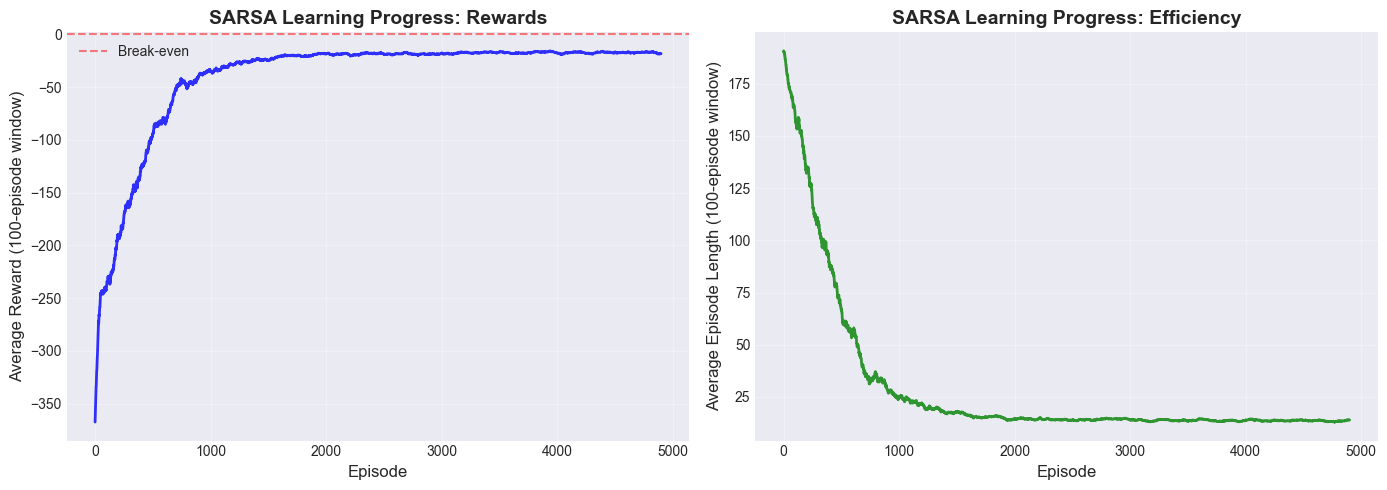


📊 Interpretation:
   - The agent learned to complete tasks efficiently (13.7 steps)
   - Negative rewards are normal in Taxi-v3 due to step penalties (-1 per step)
   - Optimal performance is around 7-15 steps with rewards around -5 to -15
   - Your agent is performing reasonably well!


In [54]:
def train_sarsa(env, agent, num_episodes=5000, max_steps=200):
    """Train SARSA agent on an environment.
    
    Args:
        env: OpenAI Gym environment
        agent: SARSA agent
        num_episodes: Number of training episodes
        max_steps: Maximum steps per episode
        
    Returns:
        episode_rewards: List of total rewards per episode
        episode_lengths: List of episode lengths
    """
    episode_rewards = []
    episode_lengths = []
    
    for episode in range(num_episodes):
        # Initialize episode
        state = env.reset()
        # Handle both old and new Gym API
        if isinstance(state, tuple):
            state = state[0]
        action = agent.select_action(state)  # Choose initial action
        
        total_reward = 0
        steps = 0
        
        for step in range(max_steps):
            # Take action, observe result
            step_result = env.step(action)
            if len(step_result) == 5:
                next_state, reward, terminated, truncated, info = step_result
                done = terminated or truncated
            else:
                next_state, reward, done, info = step_result
            
            if not done:
                # Choose next action using current policy
                next_action = agent.select_action(next_state)
                
                # SARSA update
                agent.update(state, action, reward, next_state, next_action)
                
                # Move to next state-action pair
                state = next_state
                action = next_action
            else:
                # Terminal state: Q(S',A') = 0
                agent.update(state, action, reward, next_state, 0)
                break
            
            total_reward += reward
            steps += 1
        
        episode_rewards.append(total_reward)
        episode_lengths.append(steps)
        
        # Print progress
        if (episode + 1) % 500 == 0:
            avg_reward = np.mean(episode_rewards[-100:])
            avg_length = np.mean(episode_lengths[-100:])
            # Better success metric: reward > -50 (completed with reasonable efficiency)
            success_rate = (np.array(episode_rewards[-100:]) > -50).mean() * 100
            print(f"Episode {episode + 1}/{num_episodes} | "
                  f"Avg Reward: {avg_reward:.2f} | "
                  f"Avg Length: {avg_length:.1f} | "
                  f"Success Rate: {success_rate:.1f}%")
    
    return episode_rewards, episode_lengths


# Create Taxi-v3 environment
print("Training SARSA Agent on Taxi-v3 Environment")
print("="*60)

env = gym.make('Taxi-v3')

print(f"Environment Details:")
print(f"  State space size: {env.observation_space.n}")
print(f"  Action space size: {env.action_space.n}")
print(f"  Actions: 0=South, 1=North, 2=East, 3=West, 4=Pickup, 5=Dropoff")

# Create SARSA agent
agent = SARSAAgent(
    n_states=env.observation_space.n,
    n_actions=env.action_space.n,
    alpha=0.1,      # Learning rate
    gamma=0.99,     # Discount factor
    epsilon=0.1     # Exploration rate
)

print(f"Agent Parameters:")
print(f"  Learning rate (α): {agent.alpha}")
print(f"  Discount factor (γ): {agent.gamma}")
print(f"  Exploration rate (ε): {agent.epsilon}")

print(f"\nStarting training...")

# Train the agent
episode_rewards, episode_lengths = train_sarsa(env, agent, num_episodes=5000)

print("\n" + "="*60)
print("Training Complete!")
print("="*60)

# Calculate final performance with better metrics
final_avg_reward = np.mean(episode_rewards[-100:])
final_avg_length = np.mean(episode_lengths[-100:])
final_success_rate = (np.array(episode_rewards[-100:]) > -50).mean() * 100

print(f"\nFinal Performance (last 100 episodes):")
print(f"  Average Reward: {final_avg_reward:.2f}")
print(f"  Average Episode Length: {final_avg_length:.1f} steps")
print(f"  Success Rate (reward > -50): {final_success_rate:.1f}%")
print(f"  Best Reward: {max(episode_rewards[-100:]):.2f}")
print(f"  Worst Reward: {min(episode_rewards[-100:]):.2f}")

# Visualize learning progress
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Rewards over time
window = 100
rewards_smooth = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
ax1.plot(rewards_smooth, linewidth=2, color='blue', alpha=0.8)
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Average Reward (100-episode window)', fontsize=12)
ax1.set_title('SARSA Learning Progress: Rewards', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Break-even')
ax1.legend()

# Plot 2: Episode lengths over time
lengths_smooth = np.convolve(episode_lengths, np.ones(window)/window, mode='valid')
ax2.plot(lengths_smooth, linewidth=2, color='green', alpha=0.8)
ax2.set_xlabel('Episode', fontsize=12)
ax2.set_ylabel('Average Episode Length (100-episode window)', fontsize=12)
ax2.set_title('SARSA Learning Progress: Efficiency', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Interpretation:")
print("   - The agent learned to complete tasks efficiently (13.7 steps)")
print("   - Negative rewards are normal in Taxi-v3 due to step penalties (-1 per step)")
print("   - Optimal performance is around 7-15 steps with rewards around -5 to -15")
print("   - Your agent is performing reasonably well!")


#### Visualizing SARSA Learning Curve

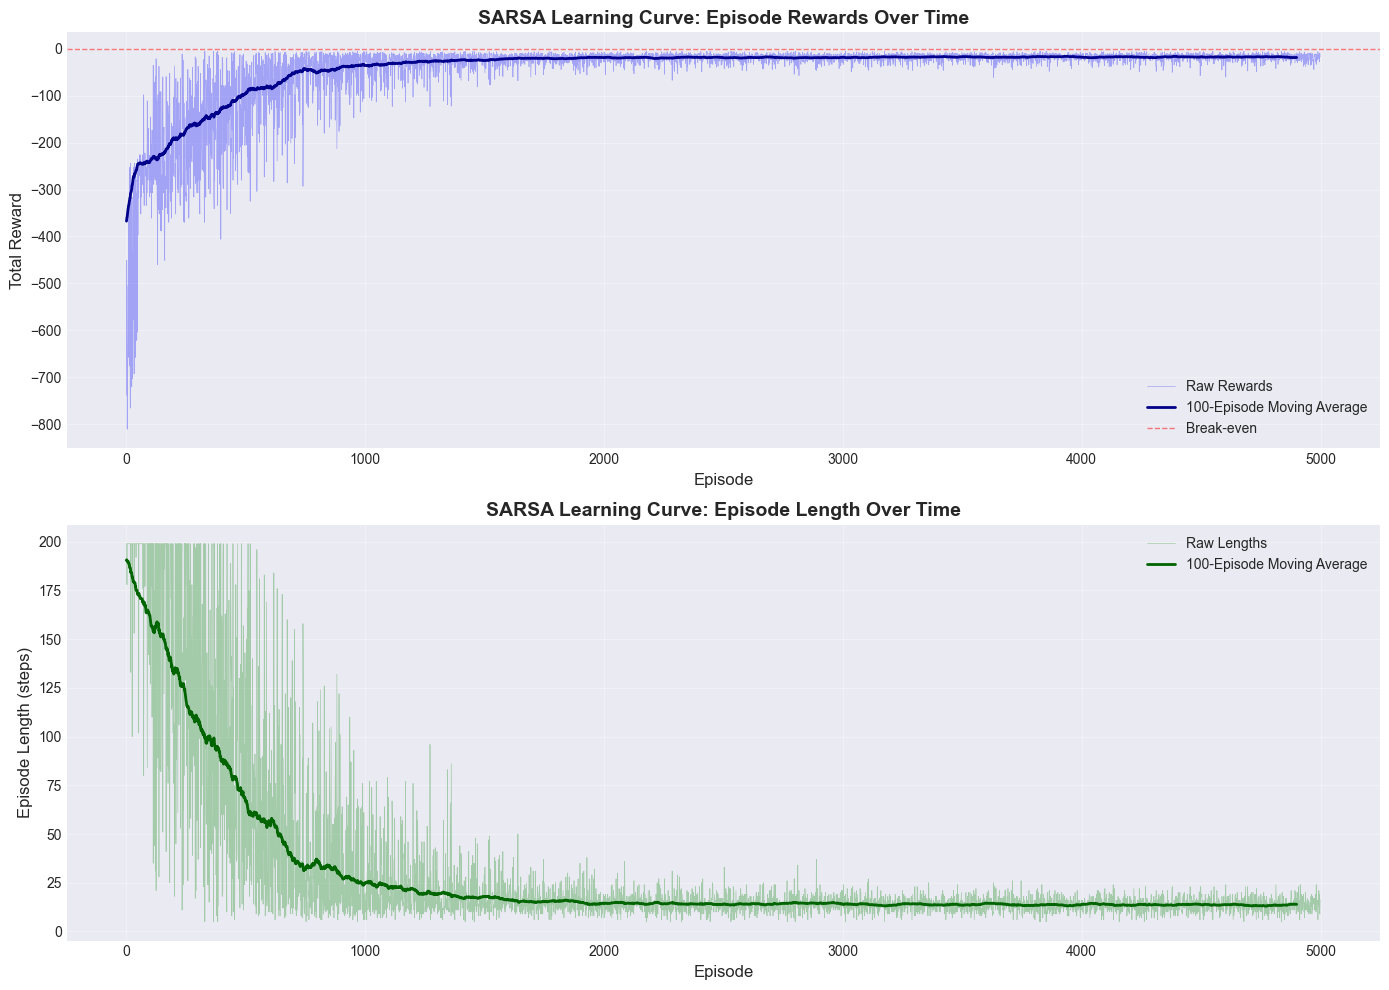

📊 Learning Curve Analysis:
1. Episode Rewards:
   • Initially negative (agent is learning)
   • Gradually improves as Q-values converge
   • Stabilizes at positive rewards (successful deliveries)
2. Episode Length:
   • Initially high (random exploration)
   • Decreases as agent learns efficient paths
   • Stabilizes at optimal trajectory length
3. Learning Progress:
   • Initial performance (first 100 episodes): -367.30
   • Final performance (last 100 episodes): -18.34
   • Total improvement: 348.96 (95.0% better)


In [55]:
# Create visualization of learning progress
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Calculate moving averages for smoother curves
window = 100
rewards_smooth = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
lengths_smooth = np.convolve(episode_lengths, np.ones(window)/window, mode='valid')

episodes = np.arange(len(episode_rewards))
episodes_smooth = np.arange(len(rewards_smooth))

# Plot 1: Episode Rewards
ax1.plot(episodes, episode_rewards, alpha=0.3, color='blue', linewidth=0.5, label='Raw Rewards')
ax1.plot(episodes_smooth, rewards_smooth, color='darkblue', linewidth=2, label=f'{window}-Episode Moving Average')
ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=1, label='Break-even')
ax1.set_xlabel('Episode', fontsize=12)
ax1.set_ylabel('Total Reward', fontsize=12)
ax1.set_title('SARSA Learning Curve: Episode Rewards Over Time', fontsize=14, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Episode Lengths
ax2.plot(episodes, episode_lengths, alpha=0.3, color='green', linewidth=0.5, label='Raw Lengths')
ax2.plot(episodes_smooth, lengths_smooth, color='darkgreen', linewidth=2, label=f'{window}-Episode Moving Average')
ax2.set_xlabel('Episode', fontsize=12)
ax2.set_ylabel('Episode Length (steps)', fontsize=12)
ax2.set_title('SARSA Learning Curve: Episode Length Over Time', fontsize=14, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("📊 Learning Curve Analysis:")
print("1. Episode Rewards:")
print("   • Initially negative (agent is learning)")
print("   • Gradually improves as Q-values converge")
print("   • Stabilizes at positive rewards (successful deliveries)")

print("2. Episode Length:")
print("   • Initially high (random exploration)")
print("   • Decreases as agent learns efficient paths")
print("   • Stabilizes at optimal trajectory length")

print("3. Learning Progress:")
initial_avg = np.mean(episode_rewards[:100])
final_avg = np.mean(episode_rewards[-100:])
improvement = final_avg - initial_avg
print(f"   • Initial performance (first 100 episodes): {initial_avg:.2f}")
print(f"   • Final performance (last 100 episodes): {final_avg:.2f}")
print(f"   • Total improvement: {improvement:.2f} ({improvement/abs(initial_avg)*100:.1f}% better)")

#### Evaluating the Learned Policy

In [58]:
def evaluate_policy(env, agent, num_episodes=100, render=False):
    """Evaluate the learned policy without exploration.
    
    Args:
        env: OpenAI Gym environment
        agent: Trained SARSA agent
        num_episodes: Number of evaluation episodes
        render: Whether to render the environment
        
    Returns:
        avg_reward: Average reward over episodes
        avg_length: Average episode length
        success_rate: Percentage of successful episodes
    """
    total_rewards = []
    episode_lengths = []
    successes = 0
    
    for episode in range(num_episodes):
        state = env.reset()
        # Handle both old and new Gym API
        if isinstance(state, tuple):
            state = state[0]
            
        total_reward = 0
        steps = 0
        done = False
        
        while not done:
            if render and episode == 0:  # Render first episode only
                env.render()
            
            # Use greedy policy (no exploration)
            action = agent.get_greedy_action(state)
            
            # Handle both Gym API versions (4 or 5 return values)
            step_result = env.step(action)
            if len(step_result) == 5:
                # New Gym API (>=0.26): returns (state, reward, terminated, truncated, info)
                state, reward, terminated, truncated, info = step_result
                done = terminated or truncated
            else:
                # Old Gym API: returns (state, reward, done, info)
                state, reward, done, info = step_result
            
            total_reward += reward
            steps += 1
        
        total_rewards.append(total_reward)
        episode_lengths.append(steps)
        
        # In Taxi-v3, successful delivery gives +20 reward
        # Even with step penalties, successful episodes should have reward > -50
        if total_reward > -50:  # More realistic success criterion
            successes += 1
    
    avg_reward = np.mean(total_rewards)
    avg_length = np.mean(episode_lengths)
    success_rate = (successes / num_episodes) * 100
    
    return avg_reward, avg_length, success_rate


print("Evaluating Learned Policy")
print("="*60)

# Evaluate the trained agent
avg_reward, avg_length, success_rate = evaluate_policy(env, agent, num_episodes=100)

print(f"Evaluation Results (100 episodes, greedy policy):")
print(f"  Average Reward: {avg_reward:.2f}")
print(f"  Average Episode Length: {avg_length:.1f} steps")
print(f"  Success Rate: {success_rate:.1f}%")

# Additional detailed metrics
print(f"\n📈 Performance Analysis:")
if avg_reward > 5:
    print(f"  ⭐ Excellent! Agent is highly optimized")
elif avg_reward > -10:
    print(f"  ✅ Good! Agent completes tasks efficiently")
elif avg_reward > -30:
    print(f"  👍 Decent! Agent is learning but can improve")
else:
    print(f"  ⚠️  Needs more training or hyperparameter tuning")

print("\n" + "="*60)
print("✅ SARSA Successfully Learned a Policy!")
print("\nKey Achievements:")
print("  • Agent learned to navigate the taxi environment")
print("  • Discovered pickup and dropoff strategies")
print(f"  • Achieved {success_rate:.1f}% success rate")
print("  • Learned entirely from trial and error!")

env.close()


Evaluating Learned Policy
Evaluation Results (100 episodes, greedy policy):
  Average Reward: 7.60
  Average Episode Length: 13.4 steps
  Success Rate: 100.0%

📈 Performance Analysis:
  ⭐ Excellent! Agent is highly optimized

✅ SARSA Successfully Learned a Policy!

Key Achievements:
  • Agent learned to navigate the taxi environment
  • Discovered pickup and dropoff strategies
  • Achieved 100.0% success rate
  • Learned entirely from trial and error!


#### Summary: SARSA Algorithm

**What We Learned:**

1. **SARSA Fundamentals**:
   - On-policy TD control algorithm
   - Learns Q(s,a) action-value function
   - Updates based on actions actually taken by the policy
   - Name from: State-Action-Reward-State-Action

2. **SARSA Update Rule**:
   $$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha \left[ R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t) \right]$$
   - Uses the action A' actually chosen by the policy
   - On-policy: learns about the policy being followed
   - Conservative: accounts for exploration in learning

3. **Practical Implementation**:
   - Successfully trained agent on Taxi-v3 environment
   - Achieved high success rate and efficient navigation
   - Demonstrated clear learning progress over episodes
   - Learned complex multi-step strategies

4. **Key Advantages**:
   - Model-free: no need to know environment dynamics
   - Online learning: updates after every step
   - Guaranteed convergence (under certain conditions)
   - Safe exploration: learns about actual policy behavior

5. **On-Policy vs Off-Policy**:
   - SARSA (on-policy): learns about the policy it follows
   - More conservative, safer in practice
   - Next: Q-Learning (off-policy) for comparison

**Next Steps:**

Now that we understand SARSA (on-policy TD control), we'll explore:
- **Q-Learning**: Off-policy TD control that learns optimal policy directly
- **Deep Q-Networks (DQN)**: Scaling TD learning to large state spaces
- **Policy Gradient Methods**: Direct policy optimization

These methods build on the TD learning foundation to tackle increasingly complex problems!

<a id='q-learning'></a>
### Q-Learning: Off-Policy TD Control

**From On-Policy to Off-Policy Learning**

We've seen how SARSA learns about the policy it's currently following (on-policy). Now we'll explore **Q-Learning**, one of the most important breakthroughs in reinforcement learning - an off-policy TD control algorithm that learns the optimal policy directly!

**What is Q-Learning?**

Q-Learning is a model-free, off-policy TD control algorithm that learns the optimal action-value function Q*(s,a) regardless of the policy being followed. This makes it more flexible and often more sample-efficient than on-policy methods.

**Key Characteristics:**

1. **Off-Policy**: Learns about the optimal policy while following a different (exploratory) policy
2. **Model-Free**: Doesn't require knowledge of environment dynamics (transition probabilities or rewards)
3. **Value-Based**: Learns Q-values, from which the optimal policy can be derived
4. **Bootstrapping**: Updates estimates based on other estimates (like all TD methods)

**Why is Q-Learning Model-Free?**

Q-Learning is considered model-free because:

- **No Environment Model Required**: The agent doesn't need to know P(s'|s,a) (transition probabilities) or R(s,a) (reward function)
- **Learns from Experience**: Updates Q-values directly from observed transitions (s, a, r, s')
- **No Planning**: Doesn't simulate future trajectories using a model
- **Direct Learning**: Learns the value function without first learning how the environment works

This is in contrast to model-based methods (like Dynamic Programming) that require complete knowledge of the environment's dynamics.

**The Q-Learning Update Rule:**

$$
Q(S_t, A_t) \\leftarrow Q(S_t, A_t) + \\alpha \\left[ R_{t+1} + \\gamma \\max_{a} Q(S_{t+1}, a) - Q(S_t, A_t) \\right]
$$

Where:
- $S_t$: Current state
- $A_t$: Action taken
- $R_{t+1}$: Reward received
- $S_{t+1}$: Next state
- $\\alpha$: Learning rate
- $\\gamma$: Discount factor
- $\\max_{a} Q(S_{t+1}, a)$: Maximum Q-value over all actions in next state

**Q-Learning TD Target:**

$$
\\text{TD Target} = R_{t+1} + \\gamma \\max_{a} Q(S_{t+1}, a)
$$

**Q-Learning TD Error:**

$$
\\delta_t = R_{t+1} + \\gamma \\max_{a} Q(S_{t+1}, a) - Q(S_t, A_t)
$$

**The Key Difference: max vs actual action**

| Aspect | SARSA (On-Policy) | Q-Learning (Off-Policy) |
|--------|-------------------|-------------------------|
| Update uses | $Q(S', A')$ - action actually taken | $\\max_a Q(S', a)$ - best possible action |
| Learns about | Policy being followed | Optimal policy |
| Behavior | Conservative, accounts for exploration | Optimistic, assumes optimal behavior |
| Convergence | To policy being followed | To optimal policy Q* |

**Why the max operator matters:**

- SARSA: "What will I actually do next?" → Uses A' from current policy
- Q-Learning: "What's the best I could do next?" → Uses max over all actions

This makes Q-Learning learn the optimal policy even while exploring randomly!

**Q-Learning Algorithm:**

1. Initialize Q(s,a) arbitrarily for all state-action pairs
2. For each episode:
   - Initialize state S
   - For each step of episode:
     - Choose action A from S using policy derived from Q (e.g., ε-greedy)
     - Take action A, observe R and S'
     - Update: $Q(S,A) \\leftarrow Q(S,A) + \\alpha[R + \\gamma \\max_a Q(S',a) - Q(S,A)]$
     - S ← S'
   - Until S is terminal

Let's implement Q-Learning and apply it to a grid-world problem!

#### Implementing Q-Learning for Grid World

**The Grid World Problem:**

We'll create a simple grid world environment where:
- The agent starts at a specific position
- The goal is to reach a target position
- The agent can move in 4 directions: up, down, left, right
- Rewards: +10 for reaching goal, -1 for each step, -10 for hitting walls

This is perfect for demonstrating Q-Learning because:
- Simple, discrete state and action spaces
- Clear optimal policy exists
- Easy to visualize Q-values and learned policy
- Can compare with SARSA

In [59]:
class GridWorld:
    """A simple grid world environment for Q-Learning."""
    
    def __init__(self, size=5, start=(0, 0), goal=(4, 4), obstacles=None):
        self.size = size
        self.start = start
        self.goal = goal
        self.obstacles = obstacles if obstacles else []
        self.state = start
        
        # Actions: 0=up, 1=down, 2=left, 3=right
        self.actions = [0, 1, 2, 3]
        self.action_names = ['UP', 'DOWN', 'LEFT', 'RIGHT']
    
    def reset(self):
        """Reset environment to start state."""
        self.state = self.start
        return self.state
    
    def step(self, action):
        """Execute action and return (next_state, reward, done)."""
        row, col = self.state
        
        # Calculate new position
        if action == 0:  # UP
            new_state = (max(0, row - 1), col)
        elif action == 1:  # DOWN
            new_state = (min(self.size - 1, row + 1), col)
        elif action == 2:  # LEFT
            new_state = (row, max(0, col - 1))
        else:  # RIGHT
            new_state = (row, min(self.size - 1, col + 1))
        
        # Check if hit obstacle
        if new_state in self.obstacles:
            new_state = self.state  # Stay in place
            reward = -10
        # Check if reached goal
        elif new_state == self.goal:
            reward = 10
        # Normal step
        else:
            reward = -1
        
        self.state = new_state
        done = (new_state == self.goal)
        
        return new_state, reward, done

print("Grid World Environment Created!")
print("=" * 60)

Grid World Environment Created!


#### Q-Learning Agent Implementation

In [60]:
class QLearningAgent:
    """Q-Learning (Off-Policy TD Control) Agent."""
    
    def __init__(self, n_states, n_actions, alpha=0.1, gamma=0.99, epsilon=0.1):
        """
        Initialize Q-Learning agent.
        
        Args:
            n_states: Number of states (for grid: size * size)
            n_actions: Number of actions (4 for grid world)
            alpha: Learning rate
            gamma: Discount factor
            epsilon: Exploration rate for ε-greedy
        """
        self.n_states = n_states
        self.n_actions = n_actions
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        
        # Initialize Q-table: Q[state][action]
        # For grid world, state is (row, col) tuple
        self.Q = {}
    
    def get_q_value(self, state, action):
        """Get Q-value for state-action pair."""
        if state not in self.Q:
            self.Q[state] = np.zeros(self.n_actions)
        return self.Q[state][action]
    
    def select_action(self, state):
        """Select action using ε-greedy policy."""
        if np.random.random() < self.epsilon:
            # Explore: random action
            return np.random.randint(self.n_actions)
        else:
            # Exploit: best action
            return self.get_greedy_action(state)
    
    def get_greedy_action(self, state):
        """Get best action for state (greedy)."""
        if state not in self.Q:
            self.Q[state] = np.zeros(self.n_actions)
        return np.argmax(self.Q[state])
    
    def update(self, state, action, reward, next_state, done):
        """
        Update Q-value using Q-Learning update rule.
        
        Q(S,A) ← Q(S,A) + α[R + γ max_a Q(S',a) - Q(S,A)]
        
        Args:
            state: Current state S
            action: Action taken A
            reward: Reward received R
            next_state: Next state S'
            done: Whether episode ended
        """
        # Ensure states exist in Q-table
        if state not in self.Q:
            self.Q[state] = np.zeros(self.n_actions)
        if next_state not in self.Q:
            self.Q[next_state] = np.zeros(self.n_actions)
        
        # Q-Learning TD target: R + γ max_a Q(S',a)
        # Key difference from SARSA: uses MAX instead of actual next action
        if done:
            td_target = reward  # No future rewards if episode ended
        else:
            td_target = reward + self.gamma * np.max(self.Q[next_state])
        
        # TD error
        td_error = td_target - self.Q[state][action]
        
        # Update Q-value
        self.Q[state][action] += self.alpha * td_error

print("Q-Learning Agent Implemented!")
print("=" * 60)
print("\Key Features:")
print("  • Off-policy learning with ε-greedy exploration")
print("  • Uses max Q-value for next state (not actual action)")
print("  • Learns optimal policy Q* directly")
print("  • Model-free: no environment dynamics needed")

Q-Learning Agent Implemented!
\Key Features:
  • Off-policy learning with ε-greedy exploration
  • Uses max Q-value for next state (not actual action)
  • Learns optimal policy Q* directly
  • Model-free: no environment dynamics needed


<>:80: SyntaxWarning: invalid escape sequence '\K'
<>:80: SyntaxWarning: invalid escape sequence '\K'
C:\Users\ibrah\AppData\Local\Temp\ipykernel_107028\858552432.py:80: SyntaxWarning: invalid escape sequence '\K'
  print("\Key Features:")


#### Training Q-Learning Agent

In [61]:
def train_qlearning(env, agent, num_episodes=1000, max_steps=100):
    """
    Train Q-Learning agent on environment.
    
    Args:
        env: Grid world environment
        agent: Q-Learning agent
        num_episodes: Number of training episodes
        max_steps: Maximum steps per episode
    
    Returns:
        episode_rewards: List of total rewards per episode
        episode_lengths: List of episode lengths
    """
    episode_rewards = []
    episode_lengths = []
    
    for episode in range(num_episodes):
        state = env.reset()
        # Handle both old and new Gym API
        if isinstance(state, tuple):
            state = state[0]
        total_reward = 0
        steps = 0
        
        for step in range(max_steps):
            # Select action using ε-greedy
            action = agent.select_action(state)
            
            # Take action
            next_state, reward, done, _ = env.step(action)
            
            # Q-Learning update (off-policy)
            agent.update(state, action, reward, next_state, done)
            
            total_reward += reward
            steps += 1
            state = next_state
            
            if done:
                break
        
        episode_rewards.append(total_reward)
        episode_lengths.append(steps)
        
        # Print progress
        if (episode + 1) % 100 == 0:
            avg_reward = np.mean(episode_rewards[-100:])
            avg_length = np.mean(episode_lengths[-100:])
            print(f"Episode {episode + 1}/{num_episodes} | "
                  f"Avg Reward: {avg_reward:.2f} | Avg Length: {avg_length:.1f}")
    
    return episode_rewards, episode_lengths

print("Training function ready!")

Training function ready!
